# Credit Card Users Churn Prediction

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h2><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h2>
<h2><center> Ensemble Technique and Model Tuning </center></h2>
<h3><center> <i>By Vaibhav Pradhan</i> </center></h3>

  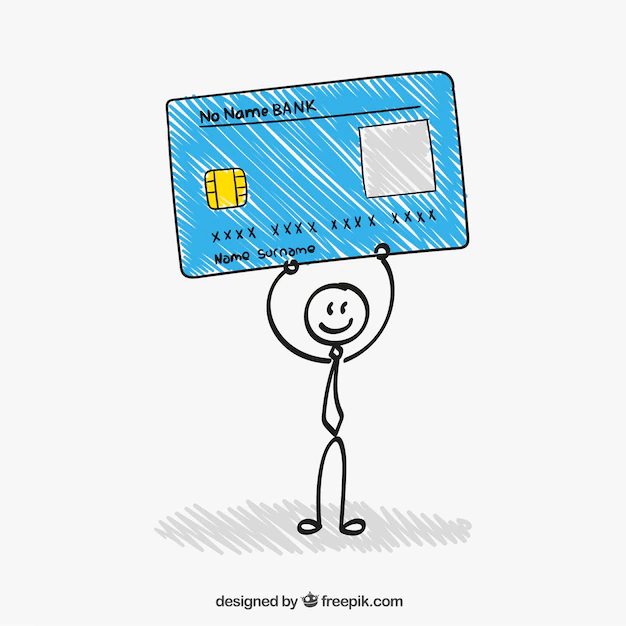

<center><h1>Credit Card Users Churn Prediction</h1><center>

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns



# To tune model, get different metric scores, and split data

import sklearn.metrics as metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/PGP-AIML/Project3/BankChurners.csv"
churn = pd.read_csv(url)

Mounted at /content/drive


## Data Overview


**Preliminary Data Observations**

*   The data has a total of 10127 records
*   21 data columns in total with 5 float, 10 integer and 6 object/string/category datatypes
*   No duplicates in the data were identified
*   Education_Level has 1519 records with missing values and Marital_Status has 749 records with missing values


- Observations & Sanity checks below:

### Checking the shape of the dataset

In [4]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

# let's create a copy of the data
data = churn.copy()

### Display the first & last few rows of the dataset

In [5]:
# first 5 rows of the data
data.head(5)

# last 5 rows of the data
data.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [6]:
# data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Checking for duplicate values

In [7]:
# Check for duplicates based on all columns

dupscheck = data.duplicated()
dupcount = 0
for dup in dupscheck:
  if dup:
     dupcount += 1

print("Duplicate rows based on all columns:", dupcount)


Duplicate rows based on all columns: 0


### Missing values check

In [8]:
# let's check for missing values in the data
data.isnull()

# Count missing values in each column
missing_count_per_column = data.isnull().sum()

print("\nMissing value count per column:")
print(missing_count_per_column)


Missing value count per column:
CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


**Education_Level** and **Marital_Status** columns have missing values

### Statistical summary of the dataset

In [9]:
# print statistical summary of the data
print(data.describe().T)

# for all columns of type object, print unique values as these columns will eventually be chnaged to type category
data.describe(include=["object"]).T

for i in data.describe(include=["object"]).columns:
  print("Unique values in", i, "are :")
  print(data[i].value_counts())
  print("*" * 50)

                             count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086    

**Anomalous Data Values**

*   Based on the above it looks like Income_Category has anomalous values of **'abc'**



### Drop columns from data that do not add value

In [10]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

### Encode <b> Attrition Flag </b> which is the target variable for analysis

In [11]:
# Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions (These are answered in line below )**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature,figsize=(12, 7),kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
     )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis



*   **Attrition_Flag:** Data indicates that a majority of customers(8000+) are "Existing Customer" whereas about a little less than 2000 ( < 20% customers  are "Attrited Customer"
*   **Age in Years**: Customer age is evenly distributed with median at 46 and mean at 46.326
*   **Gender**: 53% are Female customers and 47% are Male customers
*   **Dependent_count**: Number of dependents are evenly distributed with a max of 5 and minimum of 1
*   **Education_Level**: Large amount of customers(5000+ i.e  > 50%) have at least a graduate level education, with the second highest being high school level.
*   **Marital_Status**: Majority of customers are either married or single.
*   **Income_Category**: 35% customers have income less than $40K
*   **Card_Category**: Significant majority~93% customers use the banks "Blue" card
*   **Months_on_book**: Period of relationship with the bank spikes at 36 months
*   **Total_Relationship_Count**: Most customers hold 3 or more products.
*   **Months_Inactive_12_mon**: Almost all of the customers have been inactive for only 3 months or fewer in the past 12 months.
*   **Contacts_Count_12_mon**: Most customers hold 3 or fewer contracts in the past 12 months.
*   **Credit_Limit**: The credit limit has a skewed normal distribution with mean 2,500. There are a few outliers with a high credit limit near 35,000.
*   **Total_Revolving_Bal**: The total revolving balance has a spike at 0. Other than that it seems normally distributed around 1,500.
*   **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)
*   **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1) is normally distributed with mean 0.7. There is an outlier value of 3.5.
*   **Total_Trans_Amt**: Total Transaction Amount (Last 12 months) varies from 0 to 18484, with majority around 5000 and some outliers in the 15000 range
*   **Total_Trans_Ct**: Most customers have made a total of between 40-80 transactions in the last 12 months with a large concentration around 75
*   **Total_Ct_Chng_Q4_Q1**: Transaction Count (Q4 over Q1) has more or less remained same
*   **Avg_Utilization_Ratio**: Almost 4000 customers have average utilization of 0 whihc means they are not using the card


  


#### Histograms

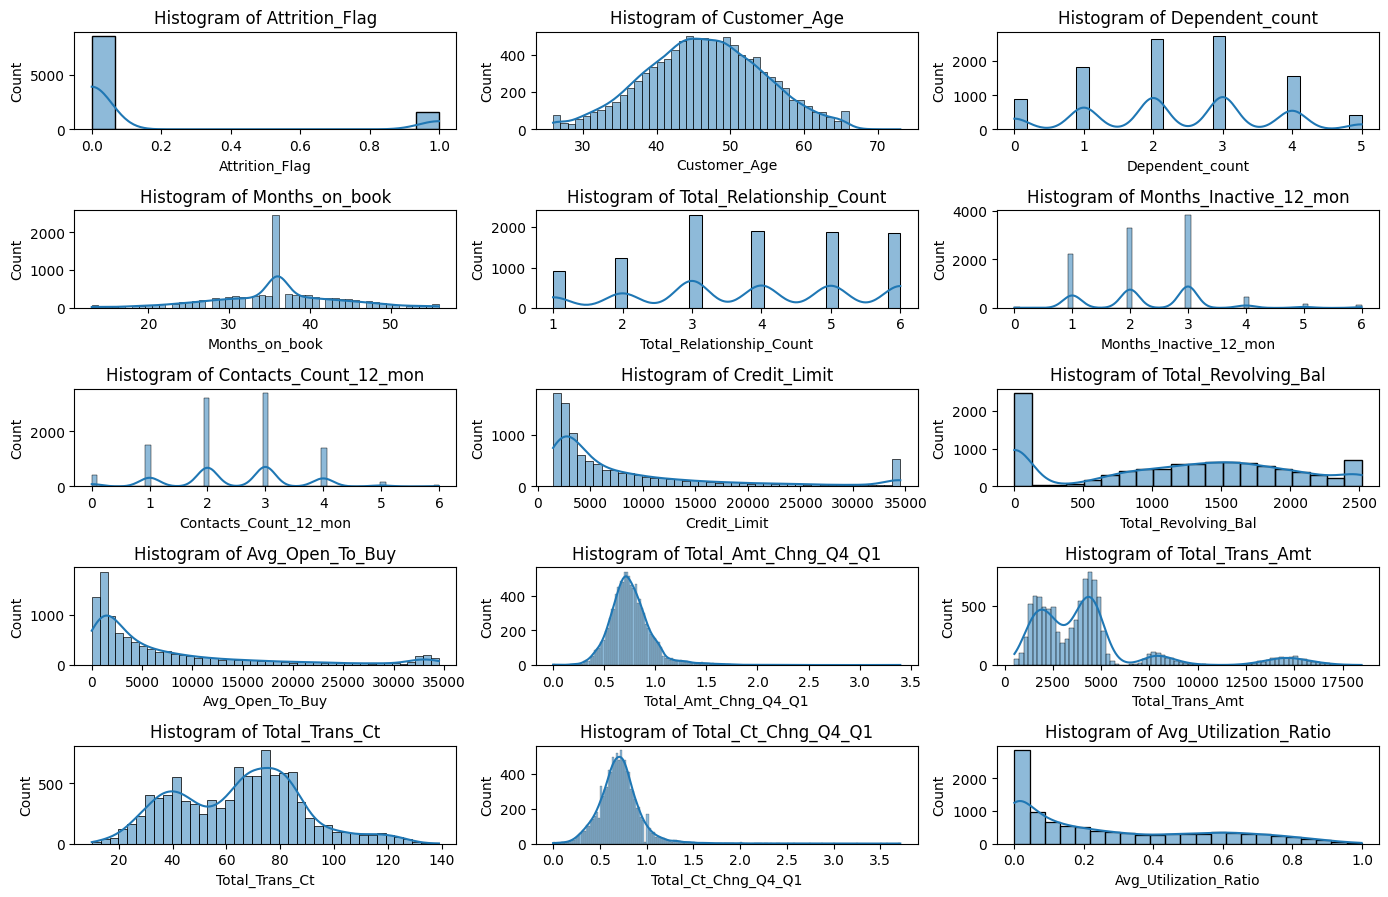

In [16]:
# Plot histograms for all numerical columns and labelled bar plots for string/object columns

numcols = data.describe(include=["int64","float64"]).columns

num_rows = (len(numcols) + 1) // 2
num_cols = 3

# Set the figure size
plt.figure(figsize=(14, 14))  # Adjust the figure size as needed

# Create histplots in a loop
for i, column in enumerate(numcols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=data[column], kde=True)  # Create a histogram with a KDE plot
    plt.title(f'Histogram of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


1. **How is the total transaction amount distributed?**
- Total Transaction Amount has a max value of 18484. It is primarily distributed around 1500 and 5000 and then has several outliers in the 15000+ range

2. **What is the distribution of the level of education of customers?**
- Large amount of customers(5000+ i.e  > 50%) have at least a graduate level education, with the second highest being high school level. Followed by customers with college at close to 20%

3. **What is the distribution of the level of income of customers?**
- Biggest chunk of customers have incomes less than $40K per year, followed by customers in the range of 40-60K

#### LabelPlots

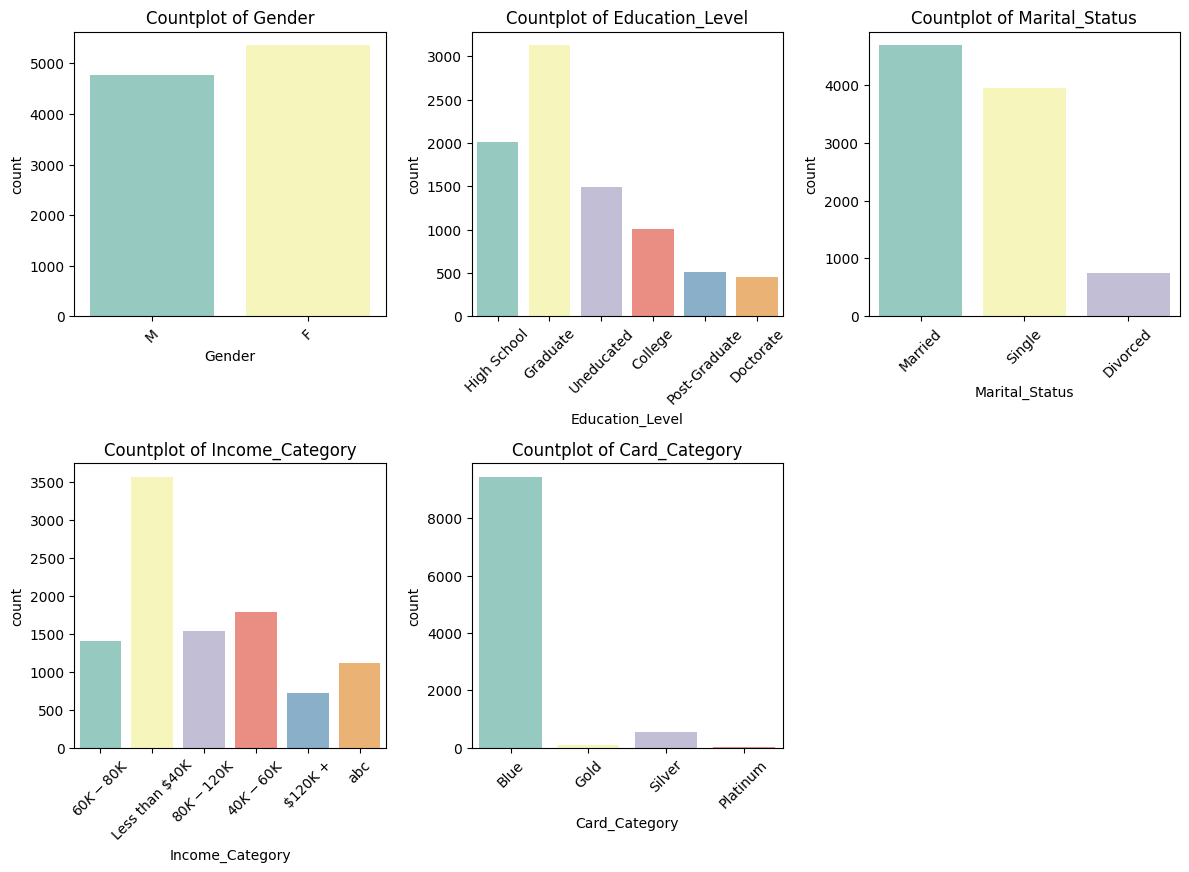

In [17]:
# Plot labelled bar plots for string/object columns


labelcols = data.describe(include=["object"]).columns

num_rows = (len(labelcols) + 1) // 2
num_cols = 3

perc=False
n=None

# Set the figure size
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

# Create labeled countplots in a loop
for i, column in enumerate(labelcols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=data, x=column, palette='Set3')  # Create a countplot
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#for item in labelcols:
#  labeled_barplot(data,item)



#### Histograms Overall

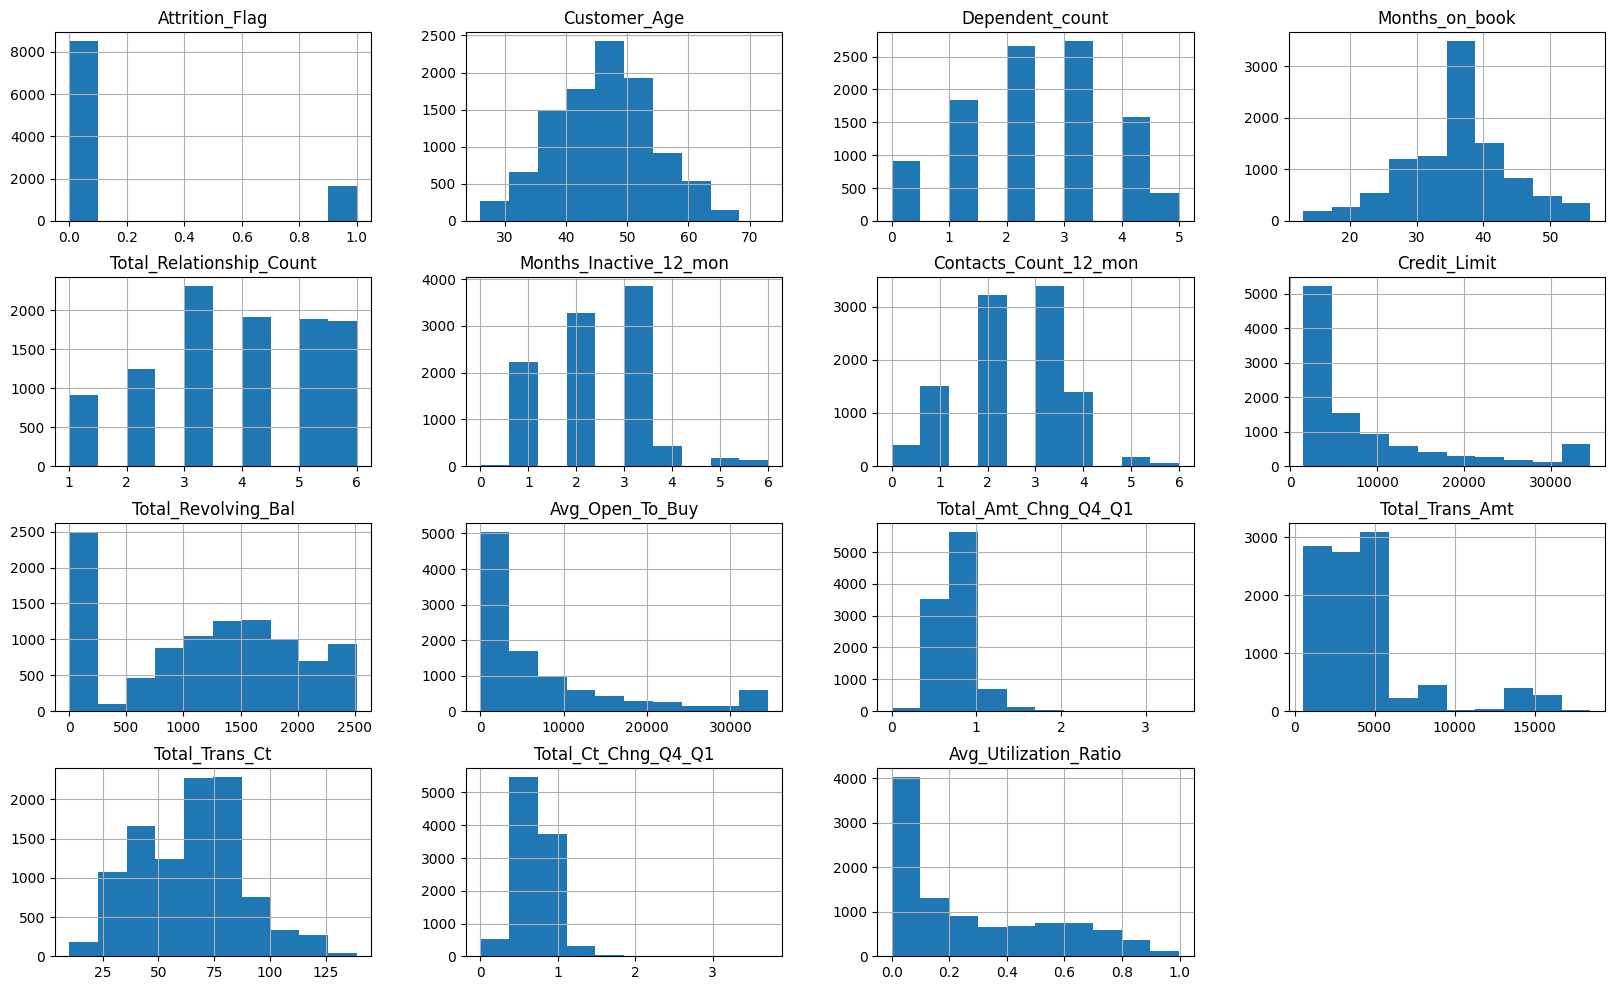

In [18]:
# creating histograms
data.hist(figsize=(20, 12))
plt.show()

### Bivariate Analysis


**Corelation Check Observations:**

*   Total Transaction Amt and Total Transaction Count have high corelation which makes sense as more transactions equals more spend. Also is an indication that that most people spend smaller amounts but have large number of transactions
*   Months on Book and Customer Age are highly corelated. Older customers have longer relationship with the bank
*   Revolving balance has a strong positive correlation to the card average utilization ratio, as people who use their credit cards more are more likley to have unpaid balance.
*   Open to Buy is is the unspent amount on the card and it has a negative correlation with Credit Card Average Utilization Ratio. More unspent amount would mean a lower utilization of the credit card.



4. ** How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?**
- Transaction Count (Q4 over Q1) has more or less remained same

5. **How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?**
- Almost all of the customers have been inactive for only 3 months or fewer in the past 12 months. Customers inactive for 4/5/6 momths are in few hundreds

6. **What are the attributes that have a strong correlation with each other?**
- As reflected in the corelation observations above, following features have very high corelation
> - Total_Transaction_Amt and Total_Transaction_Count (Positive Corelation)
> - Months_on_Book and Customer_Age (Positive Corelation)
> - Revolving_balance and average_utilization_ratio (Positive Corelation)
> - Open_to_Buy and average_utilization_ratio (Negative Corelation)



#### Corelation Checks

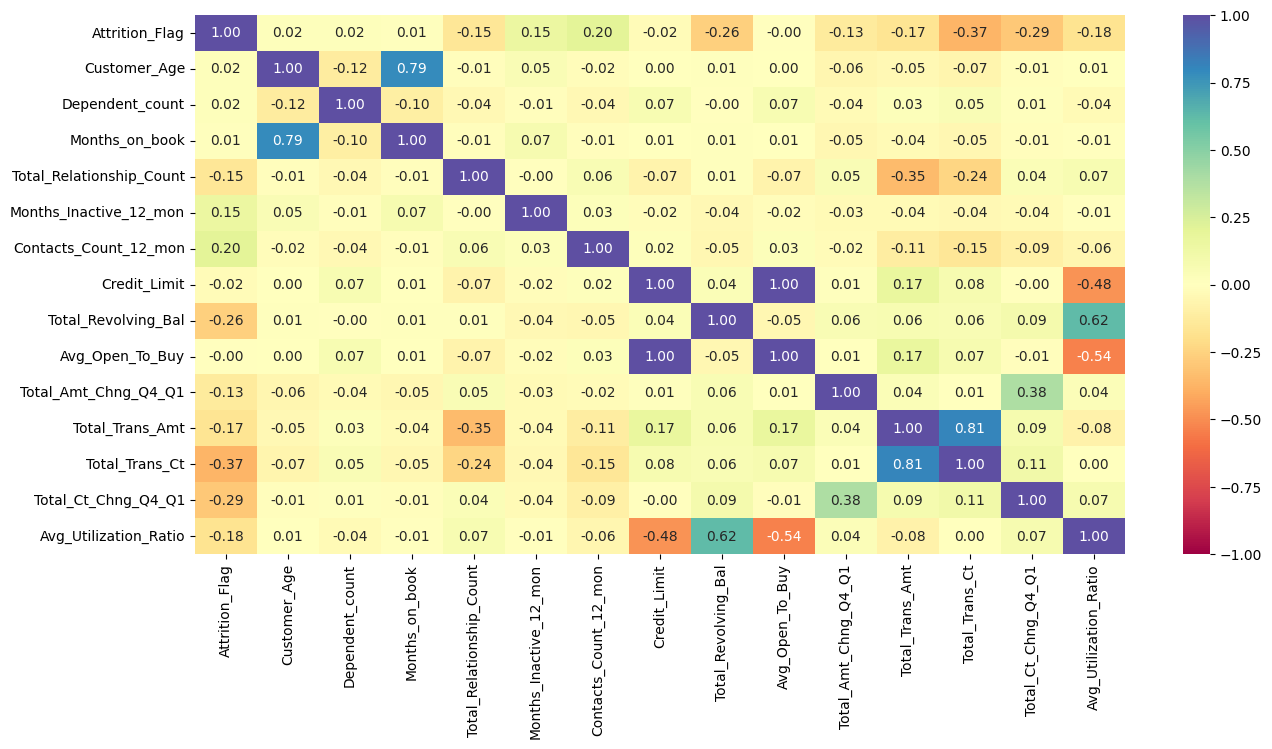

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


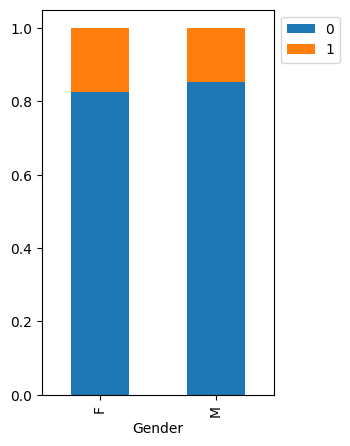

In [20]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


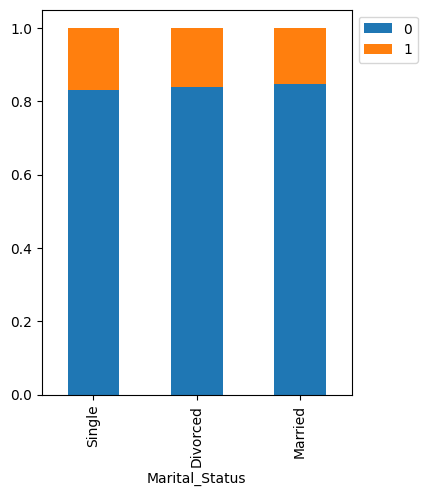

In [21]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


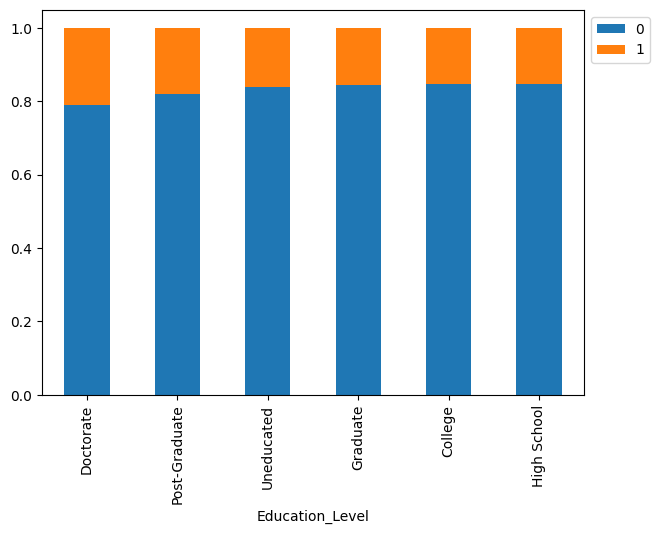

In [22]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


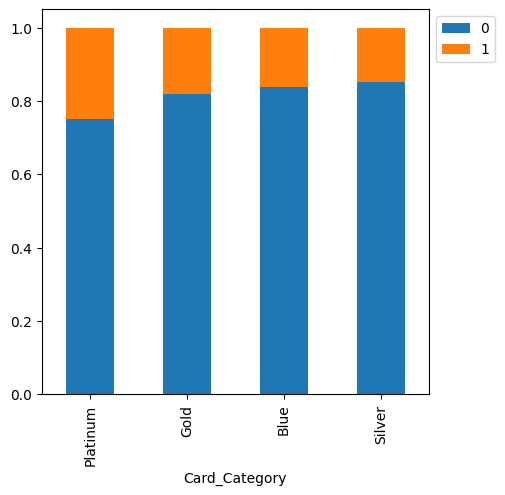

In [69]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


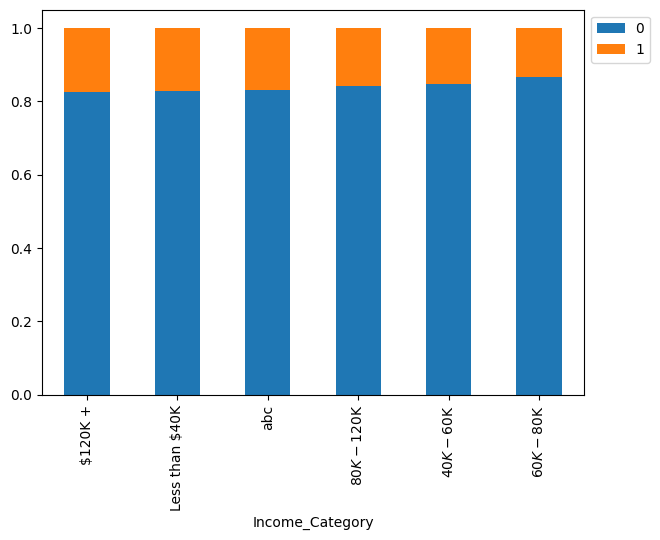

In [23]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


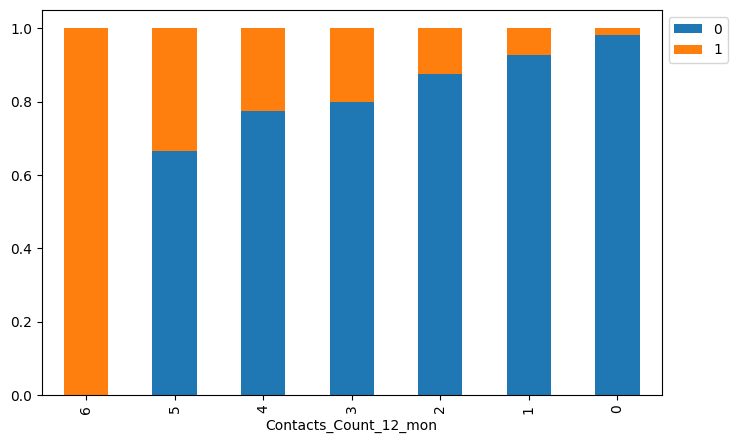

In [24]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


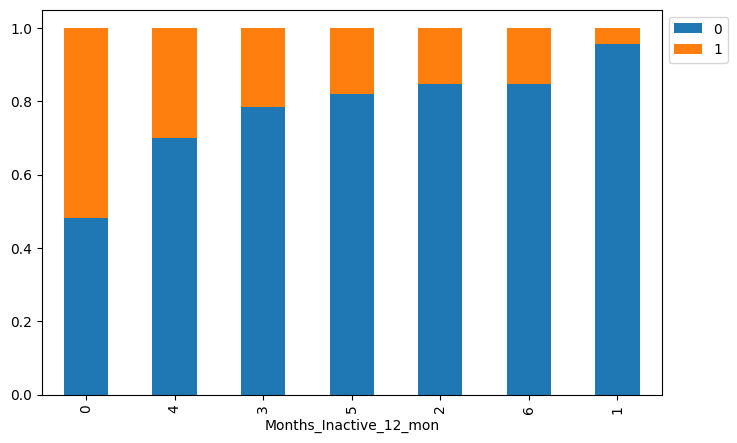

In [25]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


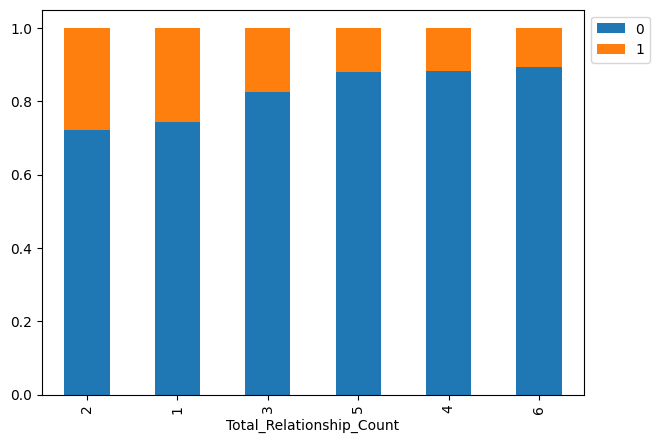

In [26]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


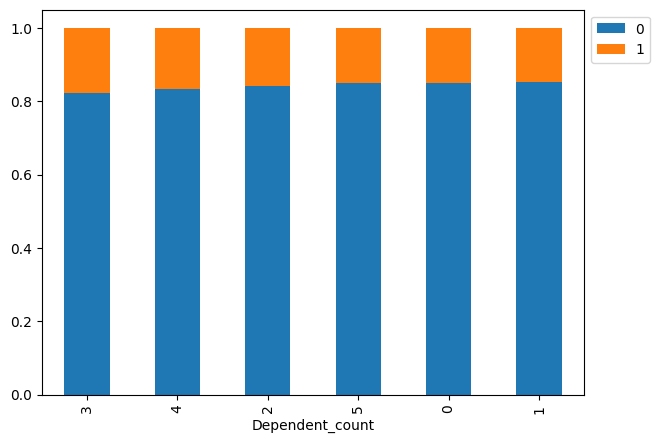

In [27]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

Total_Revolving_Bal vs Attrition_Flag

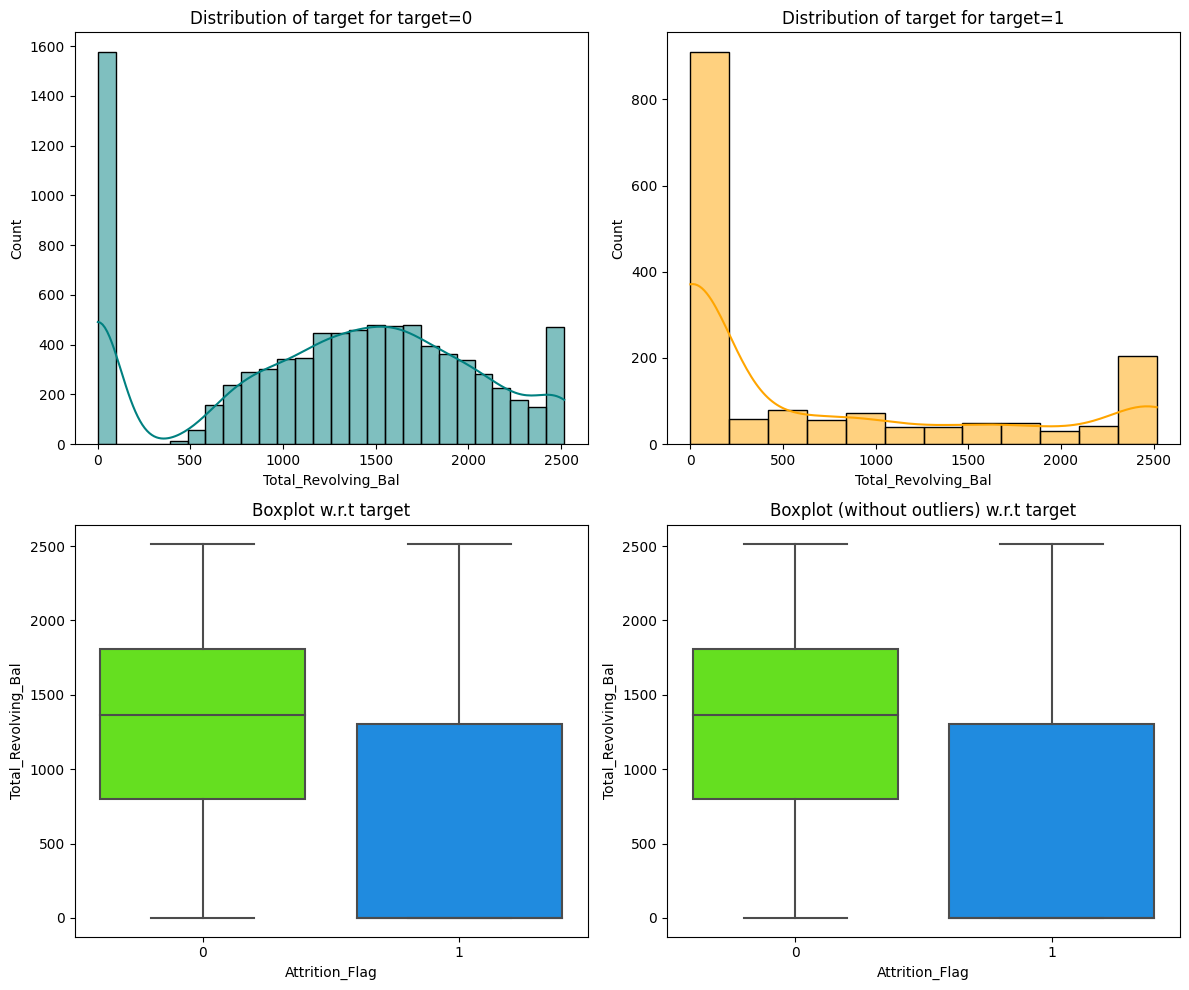

In [28]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

Attrition_Flag vs Credit_Limit

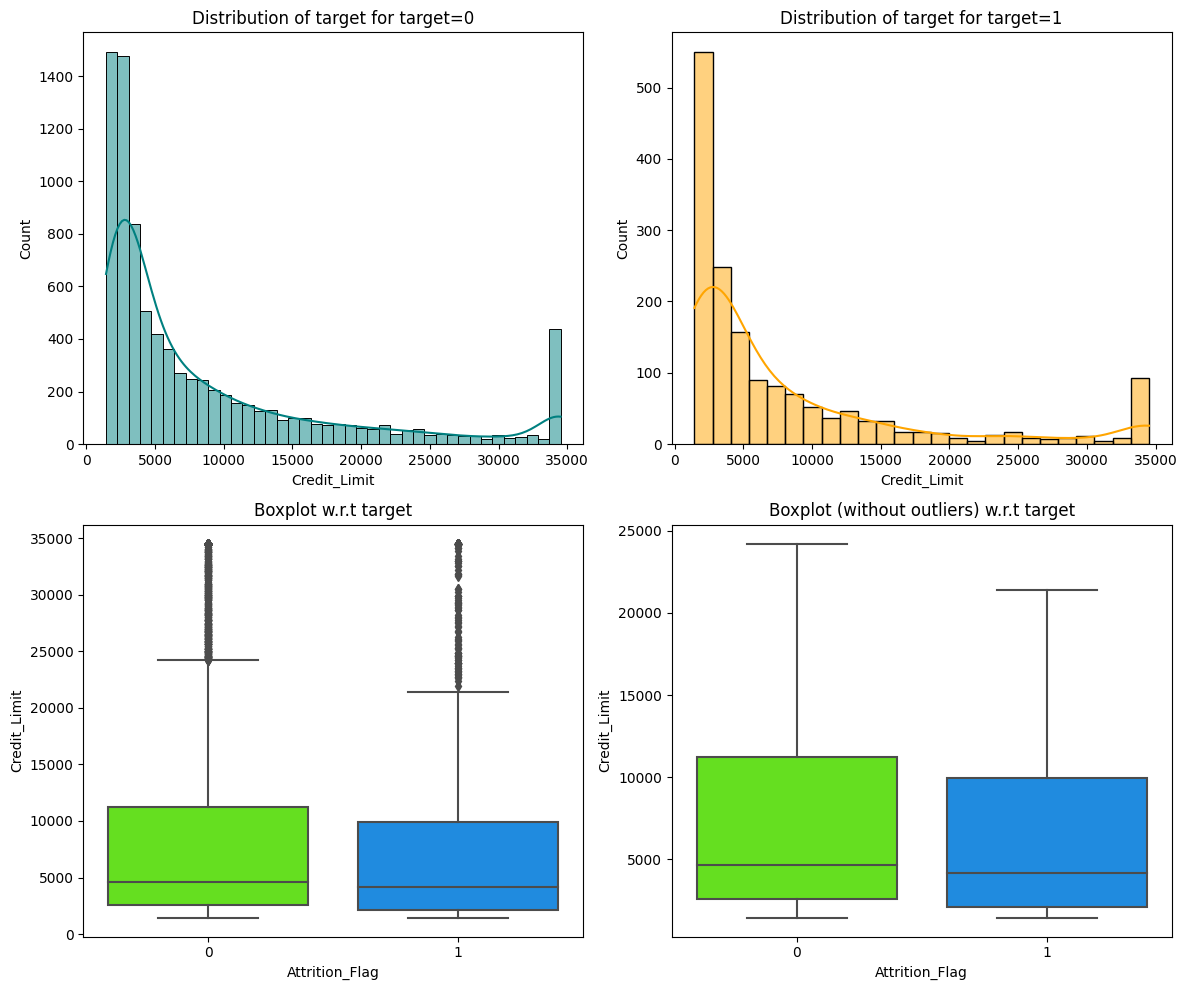

In [29]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

Attrition_Flag vs Customer_Age

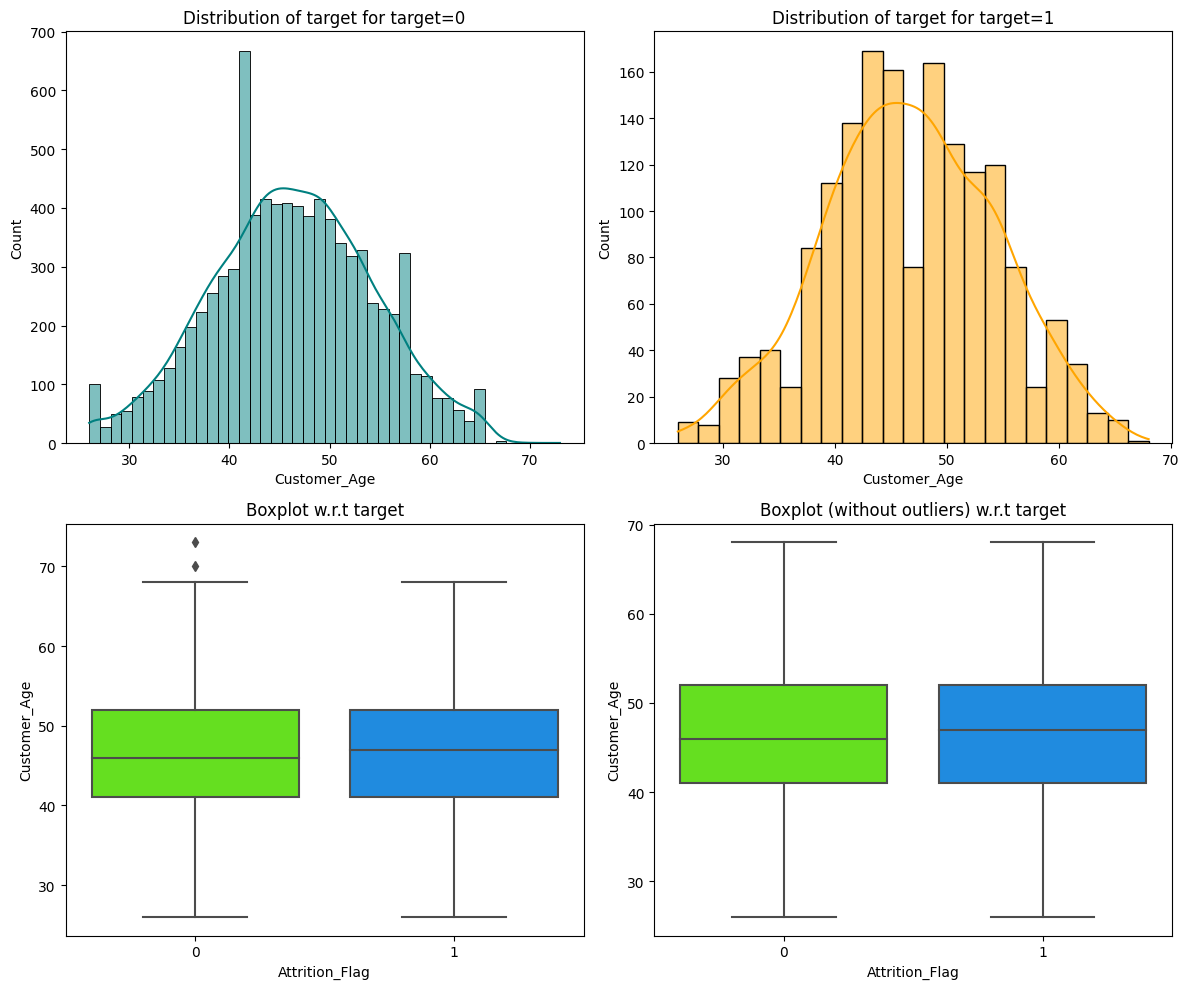

In [30]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

Total_Trans_Ct vs Attrition_Flag

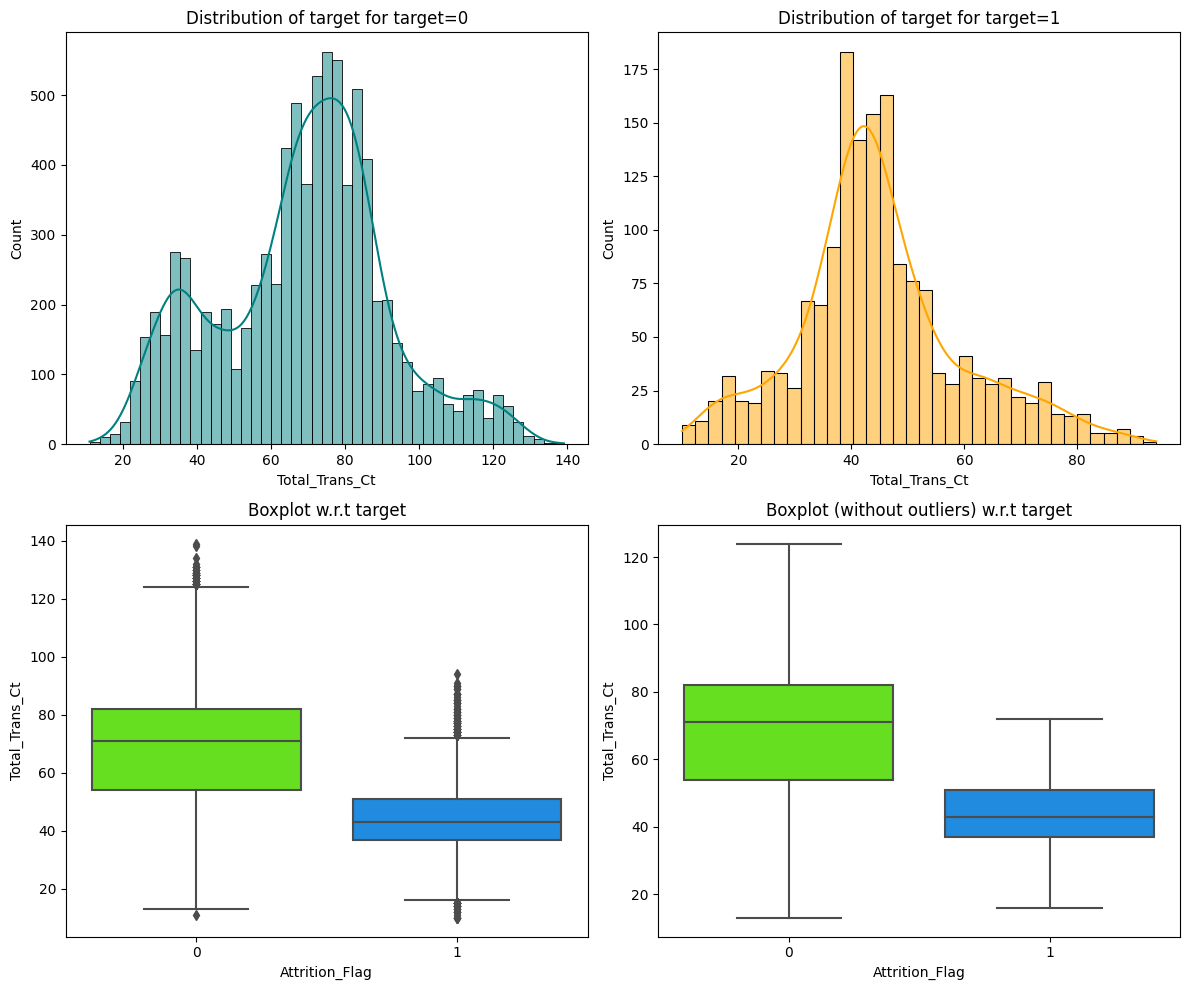

In [31]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

Total_Trans_Amt vs Attrition_Flag

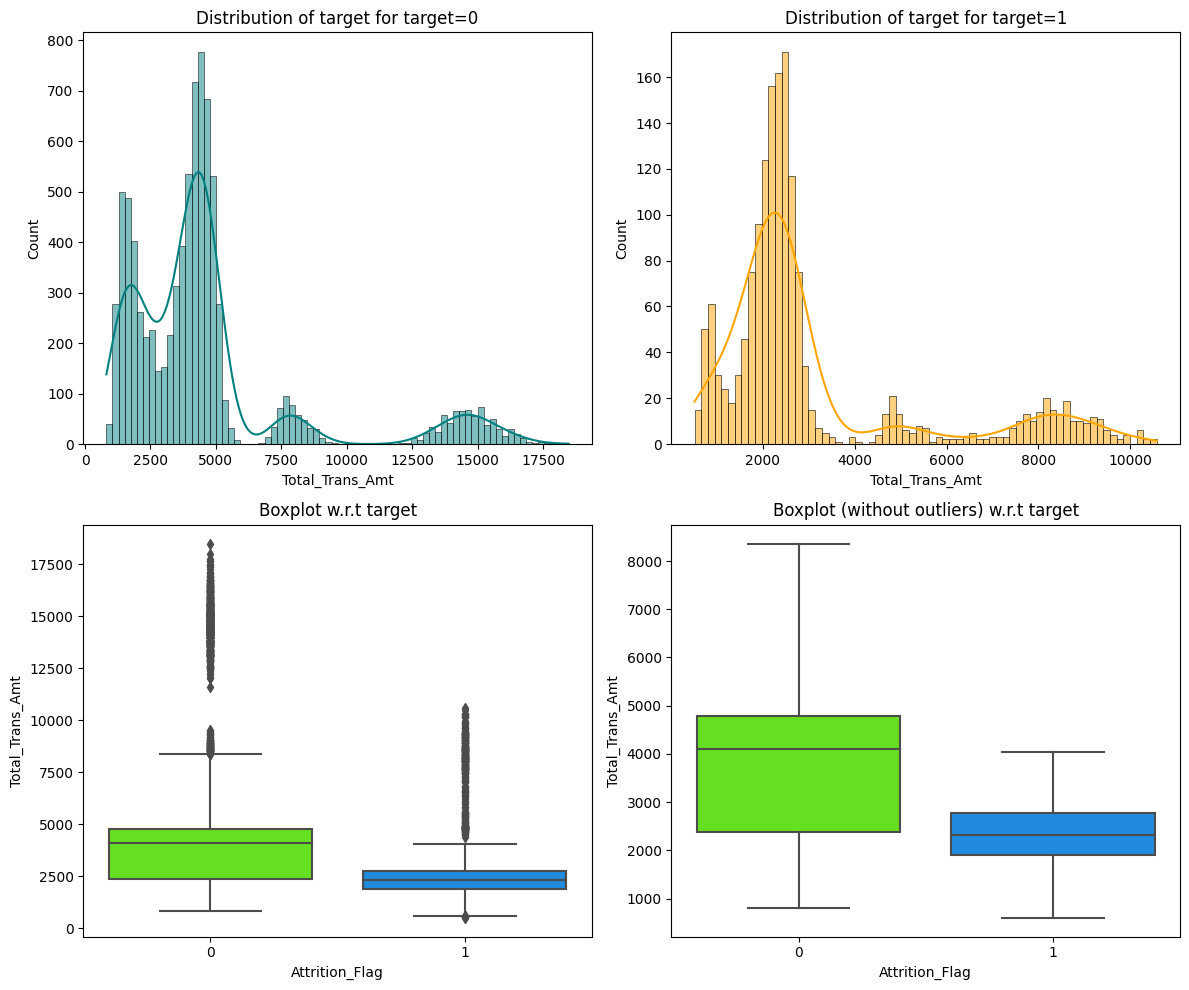

In [32]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

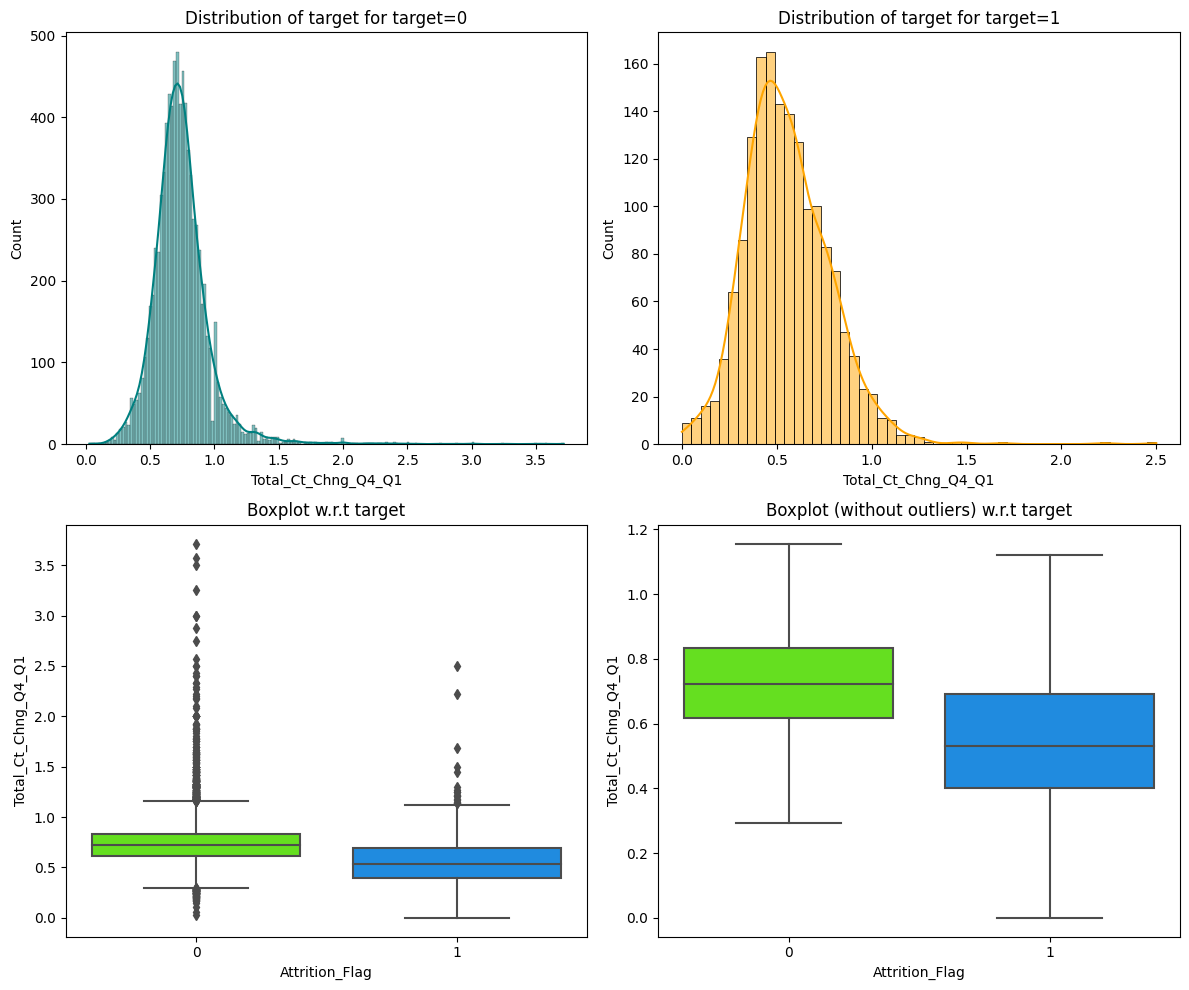

In [33]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

Avg_Utilization_Ratio vs Attrition_Flag

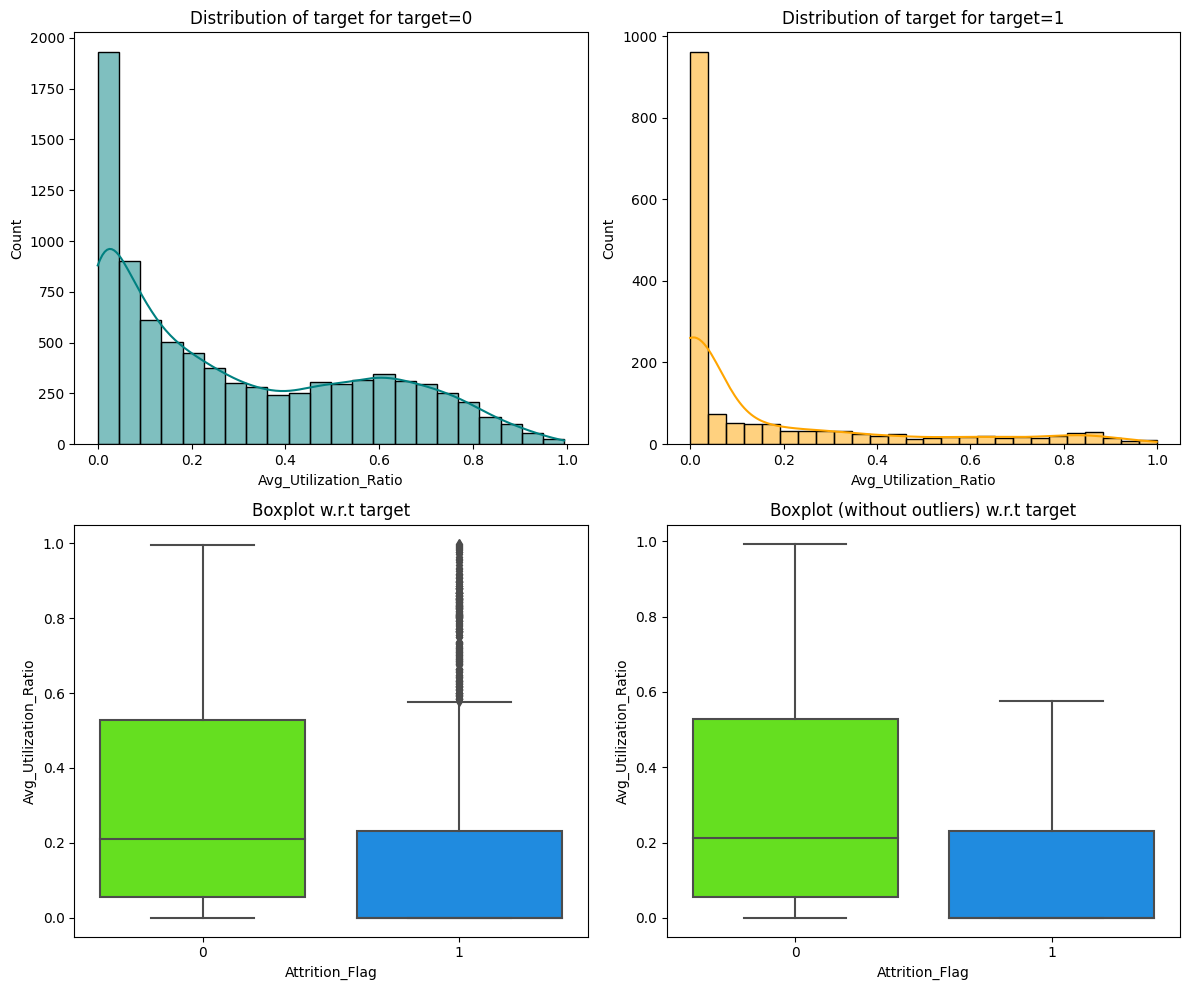

In [34]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

Attrition_Flag vs Months_on_book

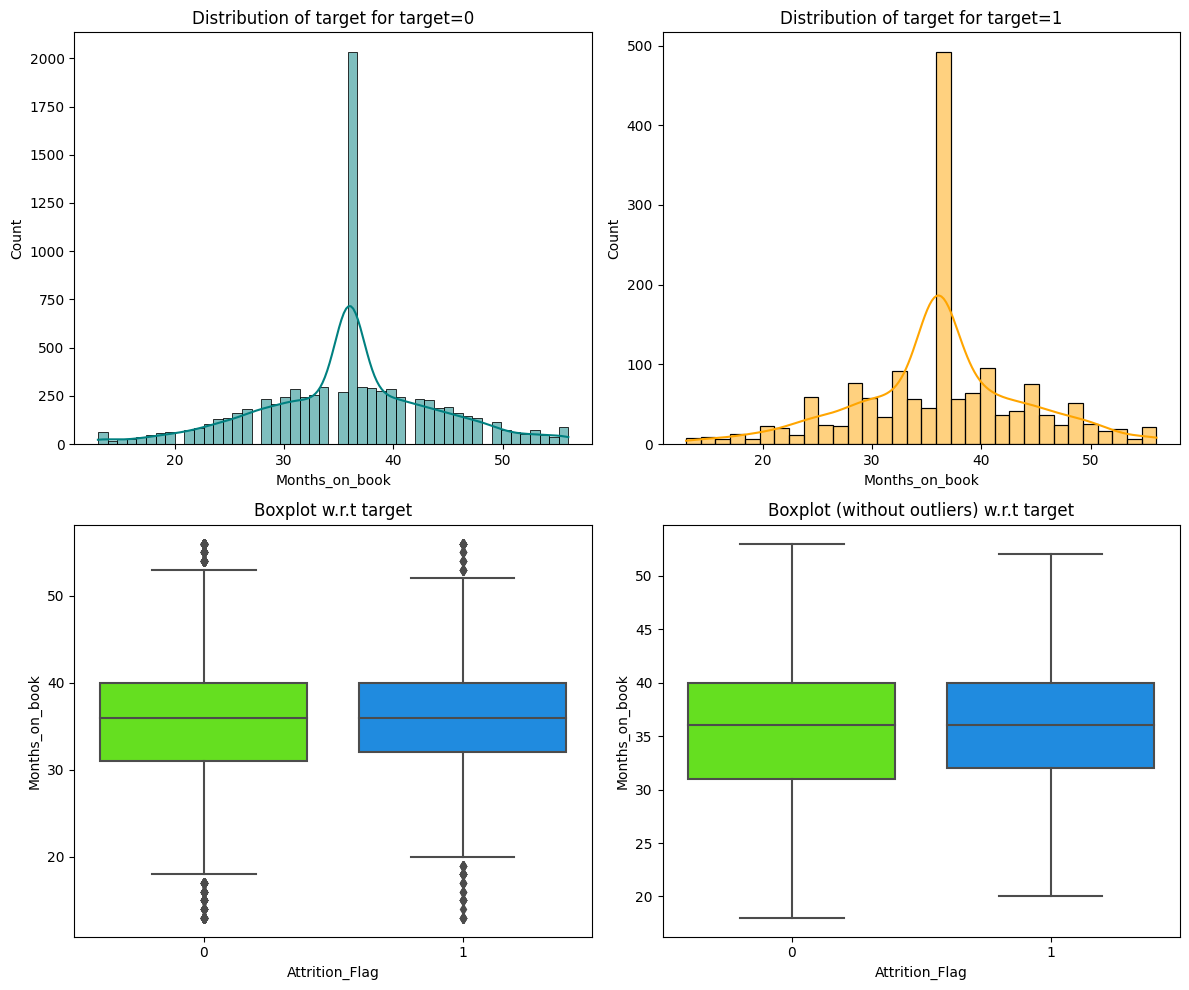

In [35]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

Attrition_Flag vs Total_Revolving_Bal

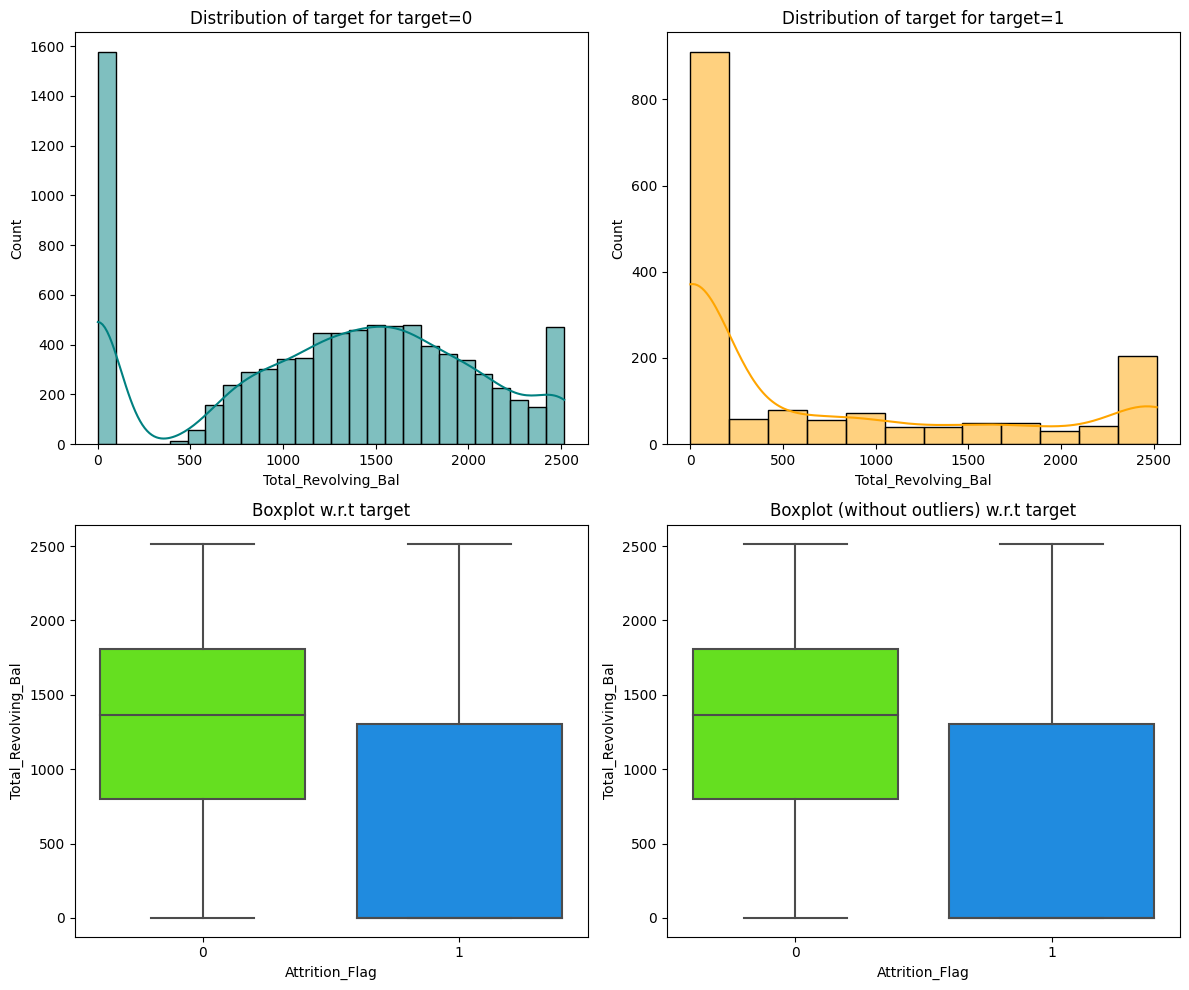

In [36]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

Attrition_Flag vs Avg_Open_To_Buy

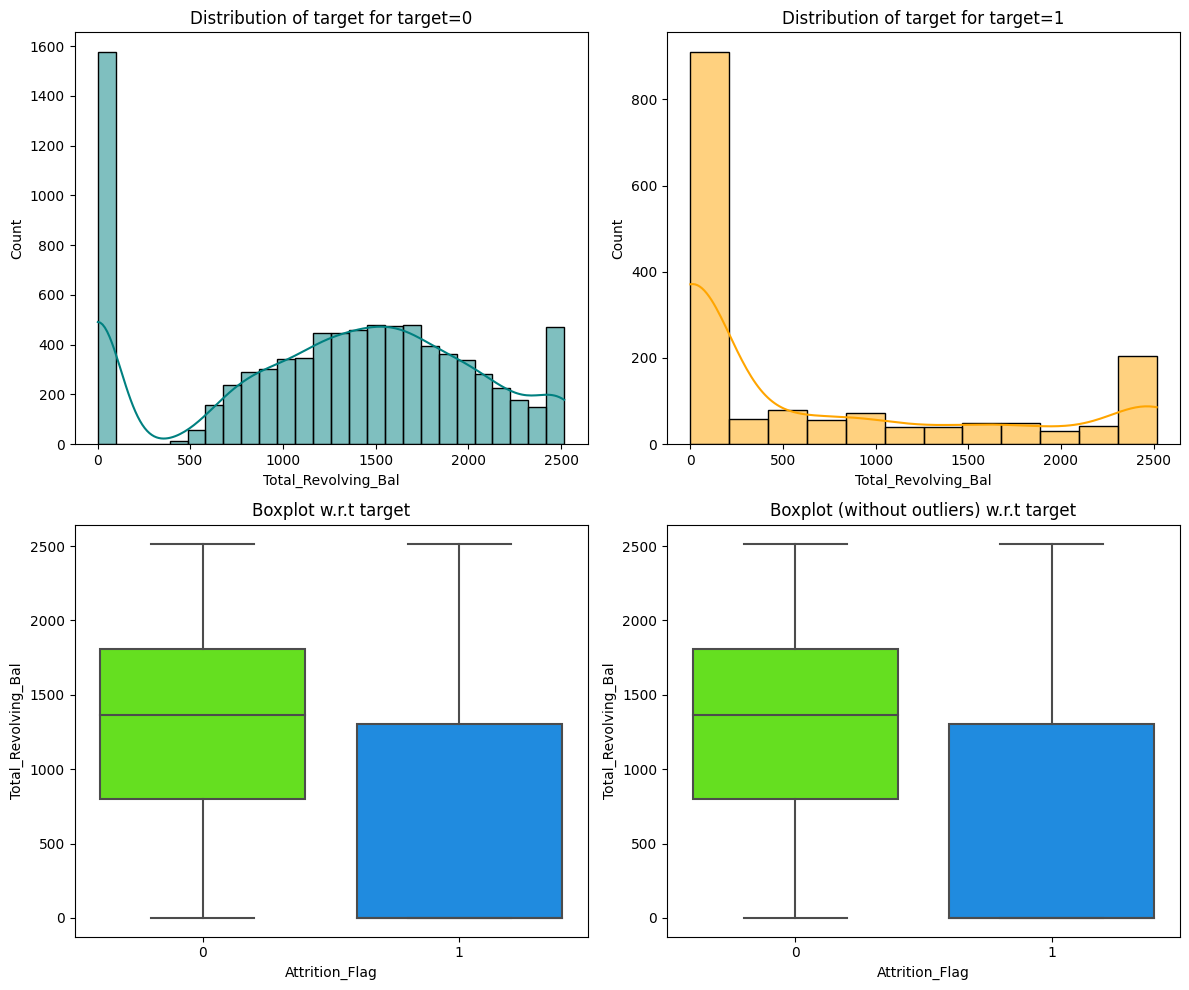

In [37]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

## Data Pre-processing



*  Credit, Average Open to Buy and Total Transaction Amout have outliers close to 8-10%
*  Missing values for Education and Marital Status as well as for Income Catgeory are imputed
*  Data is also split into train, validation and test per the specifications as required
*  Columns with object datatype that have a set of values are "One hot encoded" so as to be ready for modeling



### Outlier Detection

In [38]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Train-Test Split

In [39]:
# creating the copy of the dataframe
data1 = data.copy()

data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

data1.isnull().sum()

# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.20, stratify=y, random_state=1)  ## split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.25, stratify=y_temp, random_state=1) ## code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


### Missing value imputation




In [40]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute]) ## impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute]) ## code to impute missing values in X_test

# Checking that no column has missing values in train or test sets
print(X_train.isnull().sum())
print("-" * 30)
print(X_val.isnull().sum())
print("-" * 30)
print(X_test.isnull().sum())

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

    cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

    cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

### Encoding categorical variables

In [41]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

# check the top 5 rows from the train dataset
X_train.head()

(8101, 29) (507, 29) (1519, 29)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3105,53,2,37,5,3,4,7282.000,0,7282.000,0.740,3364,69,0.816,0.000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3721,44,4,37,4,3,3,5826.000,0,5826.000,0.689,3756,73,0.921,0.000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3389,50,3,41,4,2,2,2563.000,1860,703.000,0.680,3774,83,0.804,0.726,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3552,50,1,30,6,2,3,9771.000,1776,7995.000,0.460,2778,53,0.472,0.182,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
398,55,0,49,5,3,3,3805.000,2233,1572.000,1.095,1743,27,0.929,0.587,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.



**Model can make wrong predictions as**:

Predicting a customer as Attrition Customer but in reality, the customer  is not looking for a change - Loss of resources
Predicting a customer as Not an Attrition Customer i.e. not looking for a switch but the customer is looking to cancel the cardand severe relationship - Loss of opportunity/business

**Which case is more important?**

Predicting a customer as Attrition Customer but in reality, the customer  is not looking for a change - Loss of resources
Predicting a customer as Not an Attrition Customer i.e. not looking for a switch but the customer is looking to cancel the card and severe relationship
How to reduce this loss i.e need to reduce False Negatives?

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of Attrition customers are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a customer will not go away when there will be a customer churn, it will lead to loss of business and revenue for the bank
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.


### Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [43]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9838709677419355
Random forest: 1.0
GBM: 0.8840245775729647
Adaboost: 0.84715821812596
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
GBM: 0.9012345679012346
Adaboost: 0.8641975308641975
dtree: 0.8271604938271605
XGBoost: 0.9382716049382716


In [44]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost",XGBClassifier(eval_metric='logloss')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9823348694316436
Random forest: 1.0
GBM: 0.8840245775729647
Adaboost: 0.84715821812596
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8641975308641975
Random forest: 0.7407407407407407
GBM: 0.9012345679012346
Adaboost: 0.8641975308641975
dtree: 0.8024691358024691
XGBoost: 0.9382716049382716


In [45]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9823, Validation Score: 0.8642, Difference: 0.1181
Random forest: Training Score: 1.0000, Validation Score: 0.7407, Difference: 0.2593
GBM: Training Score: 0.8840, Validation Score: 0.9012, Difference: -0.0172
Adaboost: Training Score: 0.8472, Validation Score: 0.8642, Difference: -0.0170
dtree: Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975
XGBoost: Training Score: 1.0000, Validation Score: 0.9383, Difference: 0.0617


### Model Building with Oversampled data


In [46]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [47]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost",XGBClassifier(eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9986762759229298
Random forest: 1.0
GBM: 0.9810266215619944
Adaboost: 0.9670539785262539
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8765432098765432
Random forest: 0.8888888888888888
GBM: 0.9382716049382716
Adaboost: 0.8888888888888888
dtree: 0.8024691358024691
XGBoost: 0.9382716049382716


In [48]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9987, Validation Score: 0.8765, Difference: 0.1221
Random forest: Training Score: 1.0000, Validation Score: 0.8889, Difference: 0.1111
GBM: Training Score: 0.9810, Validation Score: 0.9383, Difference: 0.0428
Adaboost: Training Score: 0.9671, Validation Score: 0.8889, Difference: 0.0782
dtree: Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975
XGBoost: Training Score: 1.0000, Validation Score: 0.9383, Difference: 0.0617


### Model Building with Undersampled data

In [49]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [50]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost",XGBClassifier(eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
GBM: 0.9823348694316436
Adaboost: 0.9516129032258065
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9506172839506173
GBM: 0.9382716049382716
Adaboost: 0.9506172839506173
dtree: 0.9135802469135802
XGBoost: 0.9753086419753086


In [52]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9946, Validation Score: 0.9383, Difference: 0.0564
Random forest: Training Score: 1.0000, Validation Score: 0.9506, Difference: 0.0494
GBM: Training Score: 0.9823, Validation Score: 0.9383, Difference: 0.0441
Adaboost: Training Score: 0.9516, Validation Score: 0.9506, Difference: 0.0010
dtree: Training Score: 1.0000, Validation Score: 0.9136, Difference: 0.0864
XGBoost: Training Score: 1.0000, Validation Score: 0.9753, Difference: 0.0247


### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

### Three Best Models from the 18 above

- After building 18 models, it was observed that both the GBM and XGBoost models both trained on an undersampled datasetexhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same undersampled data  as we trained them on before

#### XGBoost with undersampling
#### GBM with undersampling
#### AdaBoost with undersampling

##### Tuning XGBoost model with undersampled data

In [53]:
# defining model
Model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.928544061302682:


##### GBM Model Tuned with undersampled data

In [54]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8671087533156498:


AdaBoost Model Tuning with undersampled data

In [55]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8824373710580607:


## Model Comparison and Final Model Selection

### Model Performance

#### Tuning XGBClassifier model with Undersampled data

In [56]:
tuned_xgb = XGBClassifier(
    evalmetrics='logloss',
    subsample=0.7,
    n_estimators=250,
    scale_pos_weight=10,
    learning_rate=0.2,
    gamma=3
)

tuned_xgb.fit(X_train_un, y_train_un)

[08:30:07] WARNING: ../src/learner.cc:767: 
Parameters: { "evalmetrics" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, evalmetrics='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [57]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(
    tuned_xgb, X_train_un, y_train_un
)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.991,1.000,0.982,0.991


In [58]:
# Checking model's performance on validation set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.927,0.975,0.693,0.810


#### Tuning GBMClassifier model with Undersampled data

In [59]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [60]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(
    tuned_gbm, X_train_un, y_train_un
)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.996,0.998,0.994,0.996


In [61]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.955,0.975,0.790,0.873


#### Tuning AdaBoostClassifier model with Undersampled data

In [62]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [63]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [64]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.966,0.988,0.833,0.904


### Model Performance Comparison

In [65]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_train.T,
        gbm_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Classifier trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Classifier trained with Undersampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.991,0.996,1.000
Recall,1.000,0.998,1.000
Precision,0.982,0.994,1.000
F1,0.991,0.996,1.000


In [66]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_val.T,
        gbm_val.T,
        adb_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost Classifier trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Classifier trained with Undersampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.927,0.955,0.966
Recall,0.975,0.975,0.988
Precision,0.693,0.790,0.833
F1,0.810,0.873,0.904


### Test set final performance

**Based on the model performance comparisons above, it can be inferred that AdaBoost trained model with Undersampled data has the best generalized performance**

**We will be using the model that was arrived with AdaBoost Undersampled data for final test performance**

In [67]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.937,0.947,0.736,0.828


*   The Adaboost model trained on undersampled data has given **~95% recall** on the test set
*   This performance is in line with what we achieved with this model on the train and validation sets
*   So, this is a generalized model

#### Feature Importance

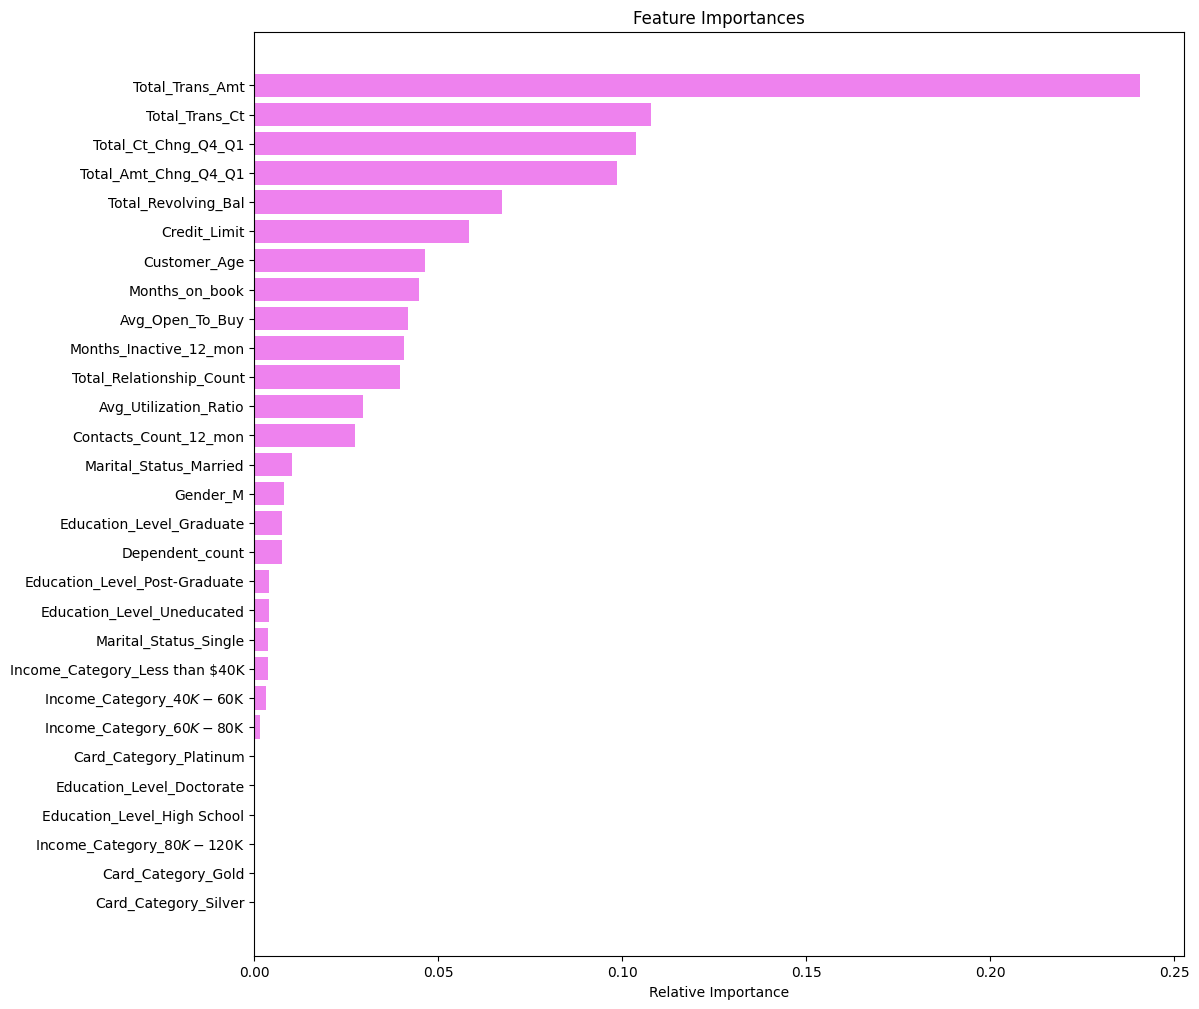

In [68]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions



*   We created a machine learning model that can predict customer attrition swith ~ 94% accuracy and ~ 95% recall using AdaBoost undersampled data
*   The Total Transaction Amount in the last 12 months is a feature that is considered to be most influential to predict attrition
*   Platinum card users have the highest attrition rate at 33%. Bank needs to analyze more of this product and maybe give more benefit to the Platinum users. Blue card customers are 90% plus and also have almost 20% churn and should be further analyzed for promos to avoid attrition
*   Moreover typically there is a spike in customer attrition when the relationship is 36 months old. Recommend to have targetted retention promos to customers from months 30 onwards so that the customer locks in for few more years



***